In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt

# from pytz import timezone

# import matplotlib.pyplot as plt

# from tvDatafeed import TvDatafeed, Interval
# from datetime import datetime, timedelta
# import requests
# import logging
# import schedule
# import time
# import threading
# import signal
# from telegram import Update
# from telegram.ext import ApplicationBuilder, CommandHandler, ContextTypes, JobQueue
# import asyncio
# import sys 


In [3]:
ccfp_df = pd.read_csv('../data/credit_card_fraud_prevention/creditcard.csv')


In [4]:
ccfp_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,...,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,...,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,...,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,...,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0
284806,172792.000,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,...,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.000,0


In [5]:
# ccfp_df[ccfp_df['Class'] == 1] # 492 rows with class 1
# ccfp_df[ccfp_df['Class'] == 0] # 284315 rows with class 0


In [6]:
ccfp_df[ccfp_df['Class'] == 0].Amount.mean()

88.29102242231328

In [7]:
ccfp_df[ccfp_df['Class'] == 1].Amount.mean()

122.21132113821139

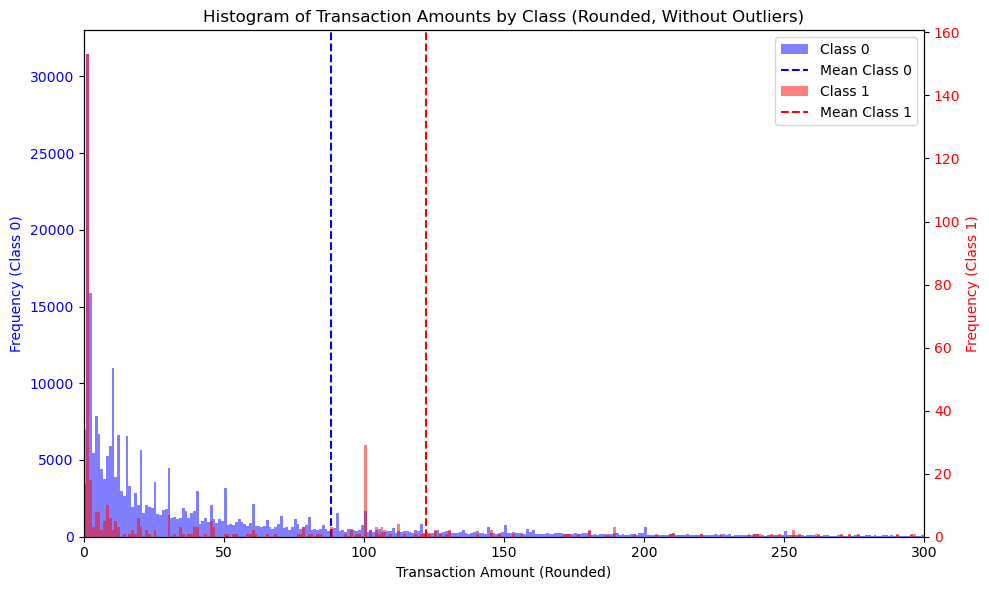

In [8]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot histogram for Class=0 on the left Y-axis
ax1.hist(ccfp_df[ccfp_df['Class'] == 0]['Amount'].round(), 
         bins=range(int(ccfp_df['Amount'].round().min()), int(ccfp_df['Amount'].round().max()) + 1, 1), 
         alpha=0.5, label='Class 0', color='blue')
ax1.set_xlabel('Transaction Amount (Rounded)')
ax1.set_ylabel('Frequency (Class 0)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add vertical bar for mean value of Class=0
mean_class_0 = ccfp_df[ccfp_df['Class'] == 0]['Amount'].mean()
ax1.axvline(mean_class_0, color='blue', linestyle='dashed', linewidth=1.5, label='Mean Class 0')

# Create a second Y-axis for Class=1
ax2 = ax1.twinx()

ax2.hist(ccfp_df[ccfp_df['Class'] == 1]['Amount'].round(), 
         bins=range(int(ccfp_df['Amount'].round().min()), int(ccfp_df['Amount'].round().max()) + 1, 1), 
         alpha=0.5, label='Class 1', color='red')
ax2.set_ylabel('Frequency (Class 1)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add vertical bar for mean value of Class=1
mean_class_1 = ccfp_df[ccfp_df['Class'] == 1]['Amount'].mean()
ax2.axvline(mean_class_1, color='red', linestyle='dashed', linewidth=1.5, label='Mean Class 1')

# Set X-axis limit to show only values from 0 to 300
ax1.set_xlim(0, 300)
ax2.set_xlim(0, 300)

# Add a united legend in a single pane
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

# Add title and show the plot
plt.title('Histogram of Transaction Amounts by Class (Rounded, Without Outliers)')
fig.tight_layout()
plt.show()


In [ ]:
# ccfp_df[ccfp_df['Class'] == 0]['Amount'].mean()

88.29102242231328

# Dataset 2

In [4]:
# Generate the data dictionary
ccfp_df_data_dict = pd.DataFrame({
    #'Column Name': ccfp_df.columns,
    'Non-Null Count': ccfp_df.notnull().sum(),
    'Distinct Count': ccfp_df.nunique(),
    'Min': round(ccfp_df.min(), 2),
    'Max': round(ccfp_df.max(), 2),
    'Avg': round(ccfp_df.mean(), 2),
    'Std. Dev': round(ccfp_df.std(), 2)
})


# Display the data dictionary

In [5]:
ccfp_df_data_dict

,Non-Null Count,Distinct Count,Min,Max,Avg,Std. Dev
Time,284807,124592,0.000,172792.000,94813.860,47488.150
V1,284807,275663,-56.410,2.450,0.000,1.960
V2,284807,275663,-72.720,22.060,0.000,1.650
V3,284807,275663,-48.330,9.380,-0.000,1.520
V4,284807,275663,-5.680,16.880,0.000,1.420
V5,284807,275663,-113.740,34.800,0.000,1.380
V6,284807,275663,-26.160,73.300,0.000,1.330
V7,284807,275663,-43.560,120.590,-0.000,1.240
V8,284807,275663,-73.220,20.010,0.000,1.190
V9,284807,275663,-13.430,15.590,-0.000,1.100


In [7]:
# import numpy as np
# import pandas as pd

# pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [8]:
ibm_hi_small_df = pd.read_csv('data/IBM/HI-Small_Trans.csv')


In [9]:
len(ibm_hi_small_df)

5078345

In [10]:
ibm_hi_small_df.head().round(3)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340,US Dollar,3697.340,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010,US Dollar,0.010,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570,US Dollar,14675.570,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970,US Dollar,2806.970,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970,US Dollar,36682.970,US Dollar,Reinvestment,0


In [11]:
ibm_hi_small_df[['Timestamp', 'From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].min()

Timestamp          2022/09/01 00:00
From Bank                         1
To Bank                           1
Amount Received               0.000
Amount Paid                   0.000
Is Laundering                     0
dtype: object

In [12]:
# Generate the data dictionary
ibm_hi_small_df_data_dict = pd.DataFrame({
    'Non-Null Count': ibm_hi_small_df.notnull().sum(),
    'Distinct Count': ibm_hi_small_df.nunique(),

    # Not every aggregate function could be calculated for every column
    'Min': ibm_hi_small_df[['Timestamp', 'From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].min(),
    'Max': ibm_hi_small_df[['Timestamp', 'From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].max(), 
    'Avg': ibm_hi_small_df[['From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].mean(), 
    'Std. Dev': ibm_hi_small_df[['From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].std()
})

# Display the data dictionary
ibm_hi_small_df_data_dict

,Non-Null Count,Distinct Count,Min,Max,Avg,Std. Dev
Account,5078345,496995,NaN,NaN,NaN,NaN
Account.1,5078345,420636,NaN,NaN,NaN,NaN
Amount Paid,5078345,923873,0.000,1046302363293.480,4509273.368,869772830.919
Amount Received,5078345,915161,0.000,1046302363293.480,5988726.070,1037183108.891
From Bank,5078345,30470,1,356303,45730.566,81765.622
Is Laundering,5078345,2,0,1,0.001,0.032
Payment Currency,5078345,15,NaN,NaN,NaN,NaN
Payment Format,5078345,7,NaN,NaN,NaN,NaN
Receiving Currency,5078345,15,NaN,NaN,NaN,NaN
Timestamp,5078345,15018,2022/09/01 00:00,2022/09/18 16:18,NaN,NaN
